| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Cross_Validation.ipynb)| [⏩](./7_Support_Vector_Machine.ipynb)|

# **6. Stacking**

![stacking](../img/stacking.jpg "stacking")

El apilamiento es una técnica de ensamblaje en machine learning que combina las predicciones de varios modelos de base para mejorar el rendimiento general del modelo. A diferencia de los métodos de ensamblaje simples, como el voto mayoritario o el promedio, el apilamiento utiliza un "meta-modelo" que toma como entrada las predicciones de los modelos de base y produce la predicción final.

**Terminología del Stacking:**

1. **Modelos de Base (Base Models):** Son los modelos individuales que se entrenan en el conjunto de datos original. Pueden ser de diferentes tipos y se entrenan de manera independiente.

2. **Meta-Modelo (Meta-learner o Stacker):** Es un modelo adicional que toma las predicciones de los modelos de base como entradas y produce la predicción final.

3. **Conjunto de Entrenamiento (Training Set):** Se divide en dos partes: una se utiliza para entrenar los modelos de base, y la otra se utiliza para entrenar el meta-modelo.

**Fórmula Matemática del Stacking:**

La predicción final del modelo apilado se calcula utilizando el meta-modelo con las predicciones de los modelos de base:

$\text{Predicción Final} = \text{Meta-Modelo}(\text{Predicciones de Modelos de Base})$

**Ejemplo con Gráficos en Python:**

Vamos a implementar el apilamiento utilizando la biblioteca scikit-learn y visualizar el rendimiento del modelo.

Precisión del modelo apilado: 0.95


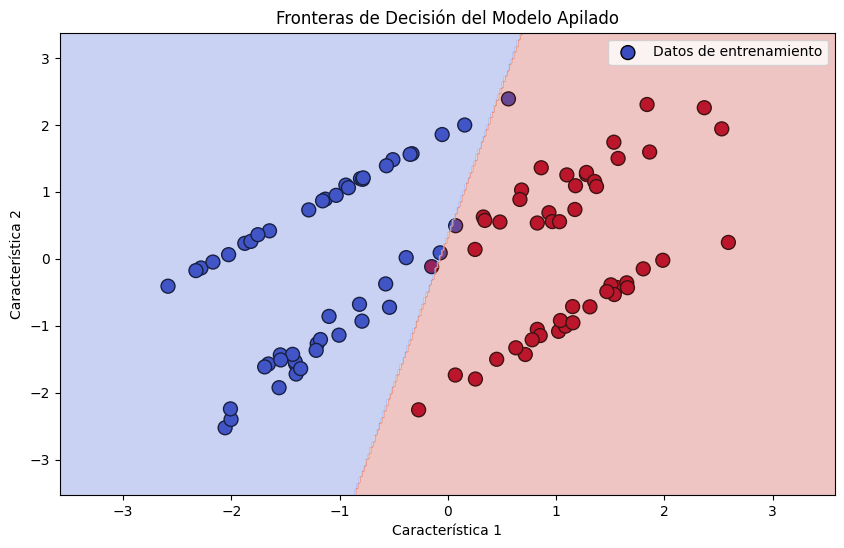

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir clasificadores base
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = LogisticRegression(random_state=42)

# Definir meta-modelo
meta_clf = DecisionTreeClassifier()

# Crear el modelo apilado
stacking_model = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=meta_clf)

# Entrenar el modelo apilado
stacking_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = stacking_model.predict(X_test)

# Calcular la precisión del modelo apilado
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo apilado: {accuracy:.2f}')

# Visualizar las fronteras de decisión
plt.figure(figsize=(10, 6))

# Scatter plot para el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de entrenamiento')

# Fronteras de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = stacking_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

plt.title('Fronteras de Decisión del Modelo Apilado')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

En este ejemplo, utilizamos dos modelos de base (Random Forest y Gradient Boosting) y un meta-modelo (Regresión Logística) para el apilamiento. El conjunto de datos Iris se utiliza para ilustrar las fronteras de decisión del modelo apilado. Este código es solo un ejemplo básico, y en la práctica, se puede explorar diferentes combinaciones de modelos de base y meta-modelos.

### **Ejemplo**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un DataFrame sintético
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Exactitud del modelo de Stacking: 1.00


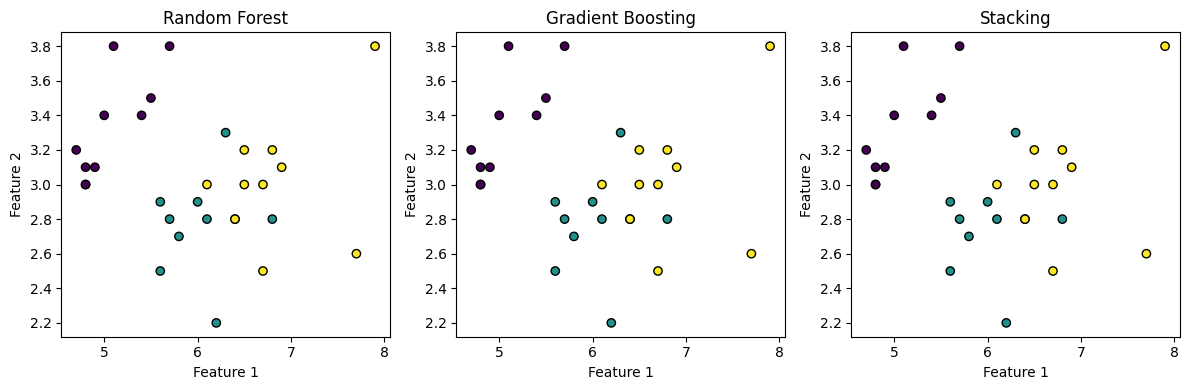

In [4]:
# Separar las características (X) y las etiquetas (y)
X = df.iloc[:, :-1]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos base
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Inicializar el modelo de stacking con un clasificador de regresión logística como metaclasificador
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=LogisticRegression(),
    cv=5  # Número de particiones para validación cruzada interna
)

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_stacking = stacking_model.predict(X_test)

# Calcular la exactitud del modelo de stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Exactitud del modelo de Stacking: {accuracy_stacking:.2f}')

# Personalizar la gráfica de dispersión
plt.figure(figsize=(12, 4))

# Modelo de Random Forest
plt.subplot(1, 3, 1)
plt.title('Random Forest')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_stacking, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Modelo de Gradient Boosting
plt.subplot(1, 3, 2)
plt.title('Gradient Boosting')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_stacking, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Modelo de Stacking
plt.subplot(1, 3, 3)
plt.title('Stacking')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_stacking, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Cross_Validation.ipynb)| [⏩](./7_Support_Vector_Machine.ipynb)|